<a href="https://colab.research.google.com/github/MickeyLeewells2020/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-04-15 16:47:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2020-04-15 16:47:23 (278 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:

def confidence_interval(data, confidence=0.95):
  data = data.dropna()
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  std_error = stats.sem(data)
  interval = std_error * stats.t.ppf((1+ confidence) / 2.0, n - 1)
  return(mean, mean - interval, mean + interval)

In [4]:
df = pd.read_csv('house-votes-84.data',
                 names=['party',
                        'handicapped-infants',
                        'water-project',
                          'budget',
                          'physician-fee-freeze',
                           'el-salvador-aid',
                          'religious-groups',
                          'anti-satellite-ban',
                          'aid-to-contras',
                        'mx-missile',
                        'immigration',
                          'synfuels',
                         'education',
                         'right-to-sue',
                        'crime',
                        'duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [5]:

df = df.replace({'y': 1, 'n': 0, '?': np.NaN})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_graph(data):
  CI = confidence_interval(data)

  data.plot.density()
  plt.axvline(x=CI[1], color='red')
  plt.axvline(x=CI[0], color='black')
  plt.axvline(x=CI[2], color='red');
  plt.show()
  return

In [28]:
df['religious-groups'].mean()

0.6415094339622641

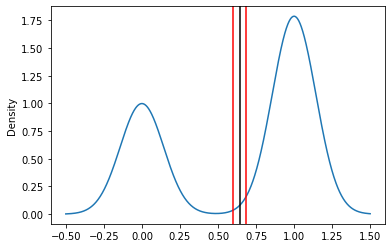

In [27]:
confidence_graph(df['religious-groups'])


In [9]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2020-04-15 16:20:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data’

abalone.data        100%[===================>] 187.38K   751KB/s    in 0.2s    

2020-04-15 16:20:52 (751 KB/s) - ‘abalone.data’ saved [191873/191873]



In [10]:
abalone = pd.read_csv('abalone.data', names=['sex','length',
                                             'diameter',
                                             'height',
                                        'whole_weight',
                                         'shucked_weight', 
                                        'viscera_weight',
                                         'shell_weight',
                                        'rings'])
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:

abalone = abalone.replace({ 'F': 2,'M': 1, 'I': 3})
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [12]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   int64  
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [13]:
observed_frequencies = pd.crosstab(abalone['sex'],abalone['rings'],margins=True)

observed_frequencies

rings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,All
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,3,6,11,27,80,172,278,294,225,118,91,56,52,30,25,18,15,12,6,3,3,1,0,1,1,0,1528
2,0,0,0,0,4,16,44,122,238,248,200,128,88,56,41,30,26,19,15,12,7,3,6,1,1,0,1,1,1307
3,1,1,12,51,100,216,267,274,173,92,62,21,24,14,10,7,7,5,2,2,1,0,0,0,0,0,0,0,1342
All,1,1,15,57,115,259,391,568,689,634,487,267,203,126,103,67,58,42,32,26,14,6,9,2,1,1,2,1,4177


In [0]:

row_sums = observed_frequencies.iloc[0:3, 28:].values
row_sums = row_sums.T[0]


col_sums = observed_frequencies.iloc[3:, 0:28].values
col_sums = col_sums[0]


total_total = abalone.shape[0]

In [15]:

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_value = column*row_sums[i]/total_total
    expected_row.append(expected_value)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)

(3, 28)
[[  0.36581278   0.36581278   5.48719176  20.8513287   42.06847019
   94.74551113 143.03279866 207.78166148 252.04500838 231.92530524
  178.15082595  97.67201341  74.25999521  46.09241082  37.67871678
   24.50945655  21.21714149  15.36413694  11.7060091    9.51113239
    5.12137898   2.19487671   3.29231506   0.73162557   0.36581278
    0.36581278   0.73162557   0.36581278]
 [  0.312904     0.312904     4.69355997  17.83552789  35.98395978
   81.0421355  122.34546325 177.72947091 215.59085468 198.38113479
  152.38424707  83.54536749  63.51951161  39.42590376  32.2291118
   20.96456787  18.14843189  13.14196792  10.01292794   8.13550395
    4.38065597   1.87742399   2.81613598   0.625808     0.312904
    0.312904     0.625808     0.312904  ]
 [  0.32128322   0.32128322   4.81924826  18.3131434   36.94757003
   83.21235336 125.62173809 182.48886761 221.36413694 203.69355997
  156.46492698  85.7826191   65.22049318  40.48168542  33.09217141
   21.52597558  18.63442662  13.49389514

In [22]:
# Scipy calculation
observed = pd.crosstab(abalone['sex'],abalone['rings'])

print(stats.chi2_contingency(observed))

(1316.0797317611496, 8.00451907105144e-240, 54, array([[  0.36581278,   0.36581278,   5.48719176,  20.8513287 ,
         42.06847019,  94.74551113, 143.03279866, 207.78166148,
        252.04500838, 231.92530524, 178.15082595,  97.67201341,
         74.25999521,  46.09241082,  37.67871678,  24.50945655,
         21.21714149,  15.36413694,  11.7060091 ,   9.51113239,
          5.12137898,   2.19487671,   3.29231506,   0.73162557,
          0.36581278,   0.36581278,   0.73162557,   0.36581278],
       [  0.312904  ,   0.312904  ,   4.69355997,  17.83552789,
         35.98395978,  81.0421355 , 122.34546325, 177.72947091,
        215.59085468, 198.38113479, 152.38424707,  83.54536749,
         63.51951161,  39.42590376,  32.2291118 ,  20.96456787,
         18.14843189,  13.14196792,  10.01292794,   8.13550395,
          4.38065597,   1.87742399,   2.81613598,   0.625808  ,
          0.312904  ,   0.312904  ,   0.625808  ,   0.312904  ],
       [  0.32128322,   0.32128322,   4.81924826,  18.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)